In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('final_data.csv')

In [5]:
data.describe()

,pH,N,P,K,OC,Particles,Water_holding_content
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,6.498879,69.971431,10.946186,146.753734,0.503173,0.269286,1.722392
std,2.178742,28.300420,7.517791,35.535056,0.266441,0.511614,0.462599
min,0.030000,25.060000,0.610000,100.040000,0.010000,0.000017,1.200000
25%,5.755000,48.895000,4.375000,109.640000,0.290000,0.001569,1.320000
50%,7.630000,65.510000,9.270000,144.330000,0.510000,0.023609,1.430000
75%,7.820000,88.405000,17.760000,178.750000,0.730000,0.115000,2.210000
max,8.000000,134.860000,25.000000,209.810000,0.950000,1.990000,2.500000


In [4]:
data.head()

,pH,N,P,K,OC,Particles,Water_holding_content,Soil_type,crop_type
0,7.03,118.72,25.00,185.82,0.78,0.001686,1.40,clay,carrot
1,2.57,131.09,24.62,181.71,0.90,0.000381,1.31,clay,carrot
2,3.39,104.32,18.37,202.39,0.76,0.000226,1.35,clay,carrot
3,2.73,111.21,21.09,202.71,0.68,0.001399,1.22,clay,carrot
4,1.52,90.90,23.76,195.39,0.74,0.001587,1.21,clay,carrot


In [6]:
print(data.isnull().sum())

pH                       0
N                        0
P                        0
K                        0
OC                       0
Particles                0
Water_holding_content    0
Soil_type                0
crop_type                0
dtype: int64


In [7]:
print(data['crop_type'].value_counts())

crop_type
melon        161
rice         151
groundnut    142
coconut      100
wheat         95
carrot        88
potatoes      82
vegetable     73
cotton        70
millet        37
Name: count, dtype: int64


In [5]:
import numpy as np

array([[<Axes: title={'center': 'pH'}>, <Axes: title={'center': 'N'}>,
        <Axes: title={'center': 'P'}>, <Axes: title={'center': 'K'}>,
        <Axes: title={'center': 'OC'}>],
       [<Axes: title={'center': 'Particles'}>,
        <Axes: title={'center': 'Water_holding_content'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

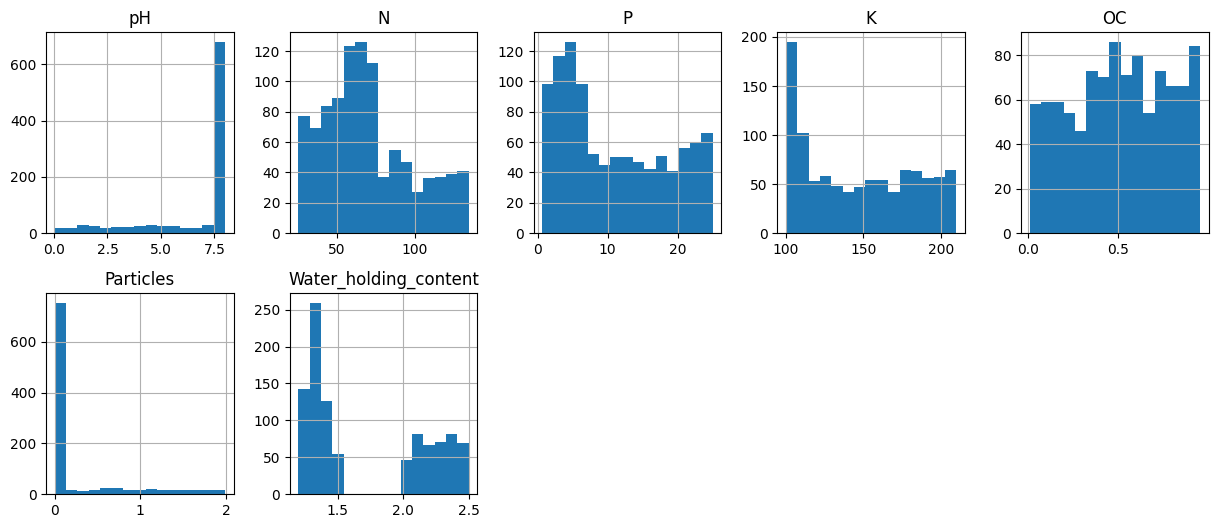

In [6]:
num_features = data.select_dtypes('number').columns
data[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 5))

In [7]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap')

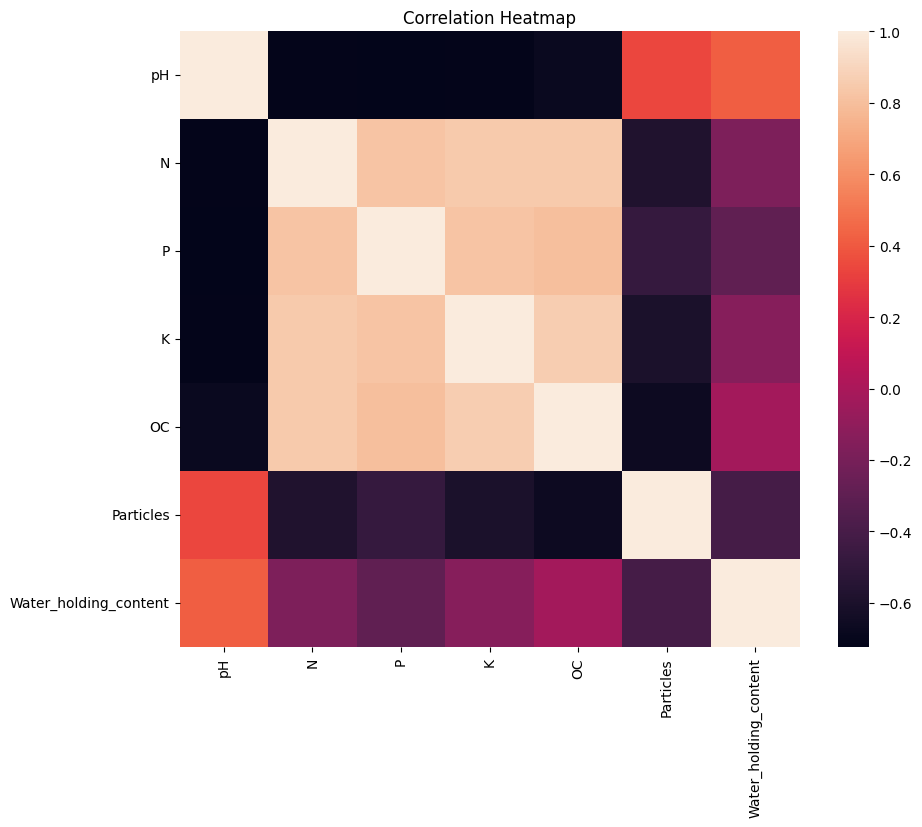

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_features].corr())
plt.title('Correlation Heatmap')

In [8]:
from dython.nominal import associations

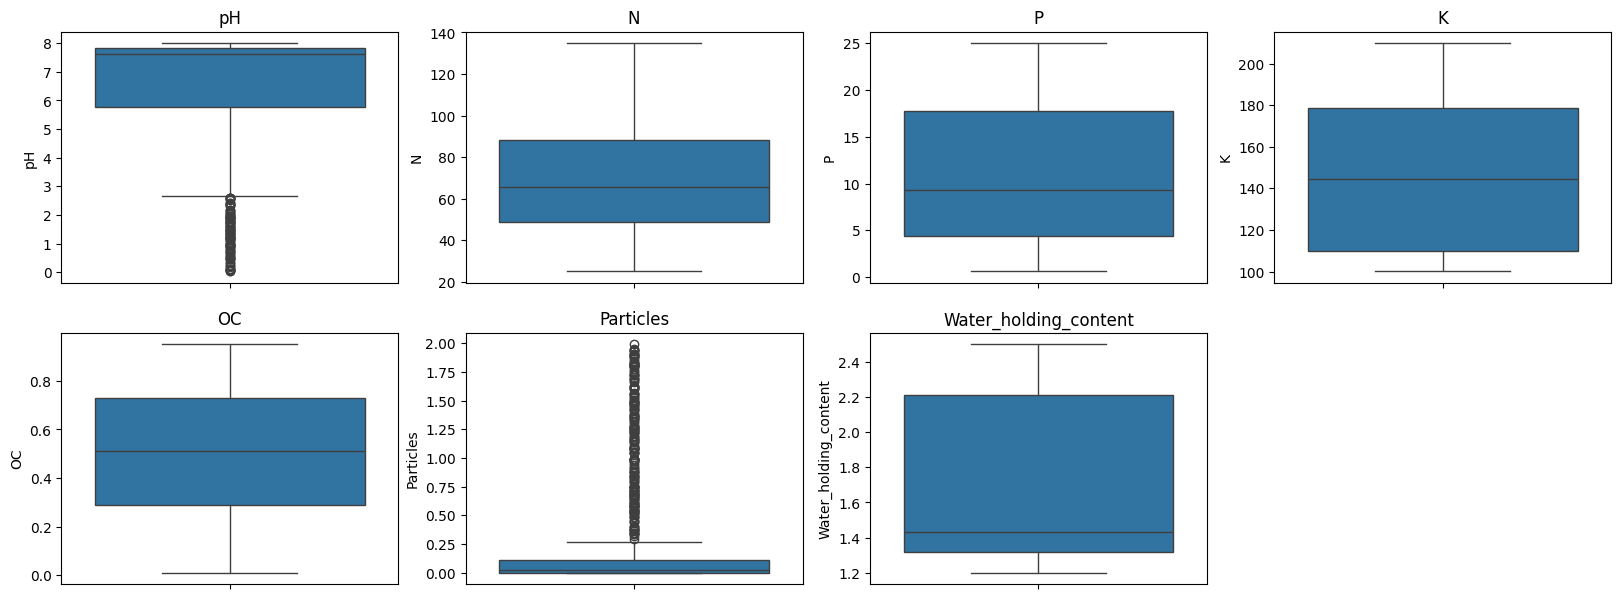

In [14]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)

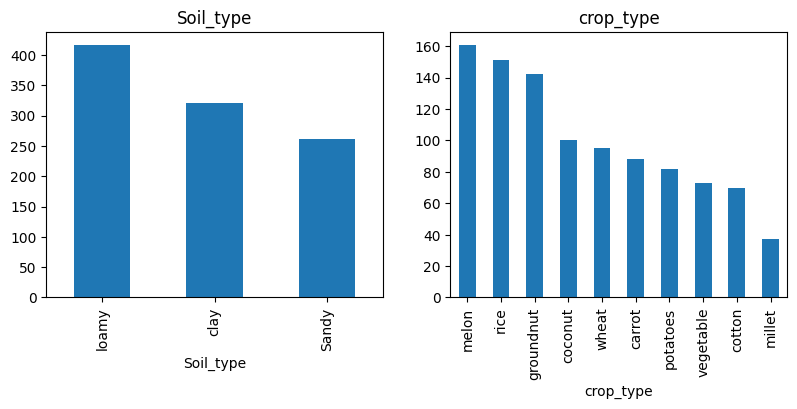

In [9]:
cat_features = data.select_dtypes(include='object').columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_features, 1):
    plt.subplot(5, 4, i)
    data[col].value_counts().plot(kind='bar')
    plt.title(col)

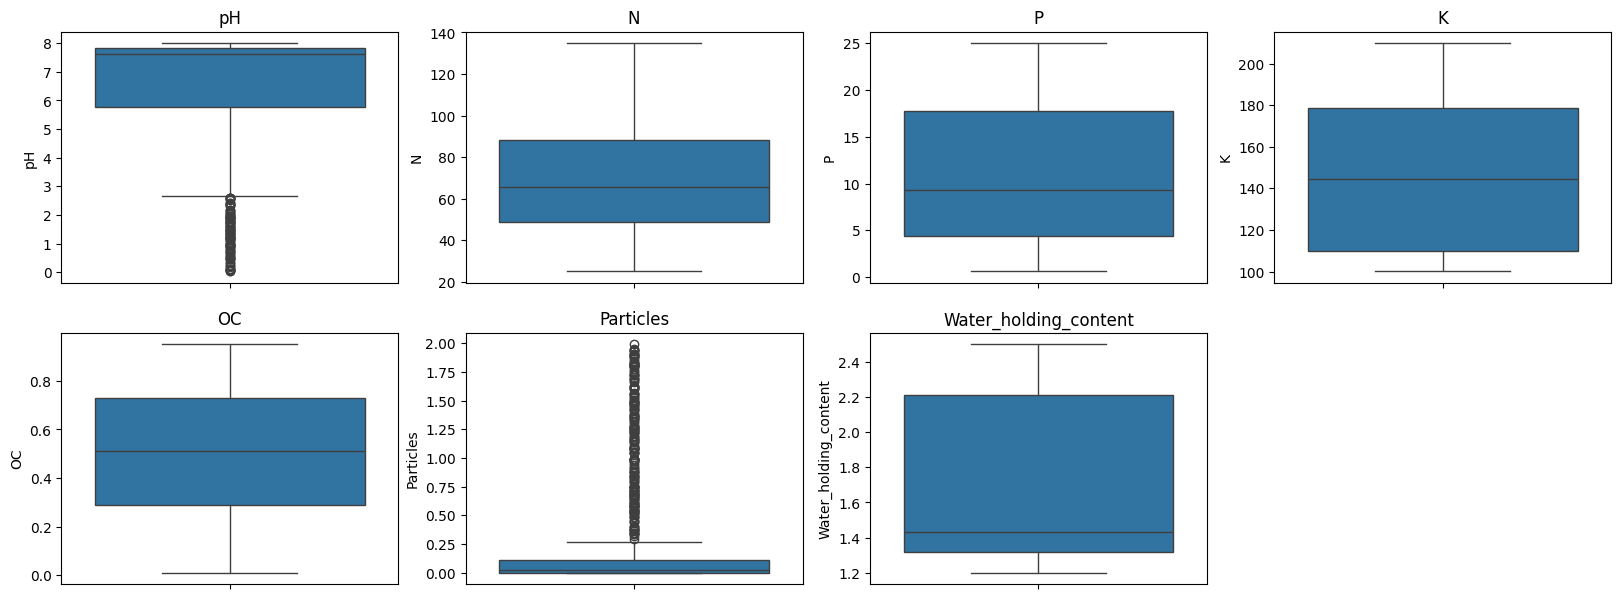

In [10]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)

In [18]:
num_features = data.select_dtypes(include=[np.number]).columns.drop(target)

# Calculate correlations
correlations = data[num_features].corrwith(data[target])

# Set a threshold for feature selection
threshold = 0.3
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

print("Selected Numeric Features:", selected_num_features)

Selected Numeric Features: []


In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode the crop_type column
label_encoder = LabelEncoder()
data['crop_type_encoded'] = label_encoder.fit_transform(data['crop_type'])

# Updated target column
target = 'crop_type_encoded'

In [19]:
from sklearn.model_selection import train_test_split

# Define features (all numeric columns except the target)
num_features = data.select_dtypes(include=[np.number]).columns.drop(target)
X = data[num_features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Training Features Shape: (799, 7)
Testing Features Shape: (200, 7)


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), num_features)
])

# Full pipeline with a classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.375
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.47      0.47        19
           1       0.33      0.58      0.42        12
           2       0.22      0.15      0.18        13
           3       0.31      0.40      0.35        35
           4       0.79      0.58      0.67        33
           5       0.00      0.00      0.00         9
           6       0.08      0.07      0.08        14
           7       0.50      0.53      0.52        30
           8       0.08      0.06      0.07        17
           9       0.23      0.33      0.27        18

    accuracy                           0.38       200
   macro avg       0.30      0.32      0.30       200
weighted avg       0.37      0.38      0.37       200



C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [21]:
print(data['crop_type'].value_counts())

crop_type
melon        161
rice         151
groundnut    142
coconut      100
wheat         95
carrot        88
potatoes      82
vegetable     73
cotton        70
millet        37
Name: count, dtype: int64
